# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#-List of modules to use
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress
#weather api key
from api_keys import weather_api_key


## Generate Cities List

In [2]:
# Items to bring to the py worktable

csvpath = os.path.join('..', 'output_data', 'cities.csv' )

In [3]:
#Import the data and make a new dataframe

city = pd.read_csv(csvpath, delimiter = ",")
city.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [4]:
#make a list of unique values from the "City" column

city_list = city.City.unique()

# city_list


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#setup the path to extract information from API
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
cloud = []
humid = []
country =[]
wind_speed = []
city_id =[]
date =[]

#------------------------------------------------------------------------------------------------


# Loop through the list of cities and perform a request for data on each
for city in city_list:
    
    try:
        print(f"Processing Record for: {city}.")
    
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        wind_speed.append(response['wind']['speed'])   
#     city_id.append(response['city']['id'])
#     date.append(response['coord']['dt'])

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
        print("------------")


Processing Record for: ostrovnoy.
Processing Record for: mahebourg.
Processing Record for: qaanaaq.
Processing Record for: zhuhai.
Processing Record for: cape town.
Processing Record for: atuona.
Processing Record for: flinders.
Processing Record for: opuwo.
Processing Record for: tiksi.
Processing Record for: pushkinskiye gory.
Processing Record for: aykhal.
Processing Record for: castro.
Processing Record for: avarua.
Processing Record for: saskylakh.
Processing Record for: constitucion.
Processing Record for: albany.
Processing Record for: vilyuysk.
Processing Record for: ushuaia.
Processing Record for: bambous virieux.
Processing Record for: kodinsk.
Processing Record for: teknaf.
Processing Record for: busselton.
Processing Record for: ambon.
Processing Record for: maragogi.
Processing Record for: fallon.
Processing Record for: kantang.
Processing Record for: colonelganj.
Processing Record for: punta arenas.
Processing Record for: rikitea.
Processing Record for: new norfolk.
Proce

Processing Record for: okha.
Processing Record for: puerto escondido.
Processing Record for: ancud.
Processing Record for: lebu.
Processing Record for: port lincoln.
Processing Record for: leningradskiy.
Processing Record for: kajaani.
Processing Record for: murray bridge.
Processing Record for: rocha.
Processing Record for: tagusao.
Processing Record for: cobija.
Processing Record for: port-gentil.
Processing Record for: te anau.
Processing Record for: hami.
Processing Record for: pahrump.
Processing Record for: fort frances.
Processing Record for: umtata.
Processing Record for: markova.
Processing Record for: saint-leu.
Processing Record for: jalu.
Processing Record for: alice springs.
Processing Record for: zaraza.
Processing Record for: dingle.
Processing Record for: bodden town.
Processing Record for: griffith.
Processing Record for: coihaique.
Processing Record for: sao felix do xingu.
Processing Record for: santa rosa.
Processing Record for: goderich.
Processing Record for: vila

Processing Record for: bolobo.
Processing Record for: nuuk.
Processing Record for: baylo.
Processing Record for: fuxin.
Processing Record for: chernaya kholunitsa.
Processing Record for: havelock.
Processing Record for: traverse city.
Processing Record for: champoton.
Processing Record for: mandalgovi.
Processing Record for: delemont.
Processing Record for: chauk.
Processing Record for: kambove.
Processing Record for: tutoia.
Processing Record for: touros.
Processing Record for: babati.
Processing Record for: graaff-reinet.
Processing Record for: noumea.
Processing Record for: pilot butte.
Processing Record for: atar.
Processing Record for: valenca do piaui.
Processing Record for: natchez.
Processing Record for: denpasar.
Processing Record for: loikaw.
Processing Record for: madaoua.
Processing Record for: malindi.
Processing Record for: along.
Processing Record for: bonito.
Processing Record for: saint anthony.
Processing Record for: high prairie.
Processing Record for: high rock.
Pro

In [7]:
temp_dict = {
#  "City_ID":index,   
 "City" : city_list,
 "Cloudiness":cloud,  
 "Country":country, 
#  "Date":date,
 "Humidity":humid,
 "Lat" : lat,
  "Lng":lng,
 "Max Temp": temp, 
 "Wind Speed":wind_speed,


    
    
}

temp_data = pd.DataFrame(temp_dict)
temp_data

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,100,RU,97,68.0531,39.5131,-0.65,3.27
1,mahebourg,40,MU,94,-20.4081,57.7000,23.00,3.60
2,qaanaaq,98,GL,69,77.4840,-69.3632,-19.29,3.08
3,zhuhai,40,CN,100,22.2769,113.5678,26.00,4.63
4,cape town,0,ZA,94,-33.9258,18.4232,17.22,2.57
...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,71,33.9674,36.6574,10.00,7.20
544,paraiso,40,CR,57,9.8383,-83.8656,27.00,7.72
545,veraval,11,IN,83,20.9000,70.3667,25.06,5.05
546,novyy urgal,35,RU,78,51.0736,132.5642,-1.87,0.72


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
temp_data.to_csv('temp_data(CB).csv')

In [9]:
temp_data

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,100,RU,97,68.0531,39.5131,-0.65,3.27
1,mahebourg,40,MU,94,-20.4081,57.7000,23.00,3.60
2,qaanaaq,98,GL,69,77.4840,-69.3632,-19.29,3.08
3,zhuhai,40,CN,100,22.2769,113.5678,26.00,4.63
4,cape town,0,ZA,94,-33.9258,18.4232,17.22,2.57
...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,71,33.9674,36.6574,10.00,7.20
544,paraiso,40,CR,57,9.8383,-83.8656,27.00,7.72
545,veraval,11,IN,83,20.9000,70.3667,25.06,5.05
546,novyy urgal,35,RU,78,51.0736,132.5642,-1.87,0.72


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#original dataframe with 548 values
cities = temp_data
cities


,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,100,RU,97,68.0531,39.5131,-0.65,3.27
1,mahebourg,40,MU,94,-20.4081,57.7000,23.00,3.60
2,qaanaaq,98,GL,69,77.4840,-69.3632,-19.29,3.08
3,zhuhai,40,CN,100,22.2769,113.5678,26.00,4.63
4,cape town,0,ZA,94,-33.9258,18.4232,17.22,2.57
...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,71,33.9674,36.6574,10.00,7.20
544,paraiso,40,CR,57,9.8383,-83.8656,27.00,7.72
545,veraval,11,IN,83,20.9000,70.3667,25.06,5.05
546,novyy urgal,35,RU,78,51.0736,132.5642,-1.87,0.72


In [11]:
#  List of indicies that have valuse that have a humidity of 100.
onehundered_cities = cities.Humidity[cities.Humidity==100].index.tolist()

print(onehundered_cities)

[3, 146, 223, 256, 304, 331, 405, 432, 482, 530]


In [12]:
#  List of indices of cities that have humidity over 100%.
#----------------------------------------------------------------------
over_hundered_cities = cities.Humidity[cities.Humidity>100].index.tolist()

over_hundered_cities

[]

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [14]:
w_cities_humid = cities

w_cities_humid2 = w_cities_humid.drop(w_cities_humid[(w_cities_humid['Humidity']>100)].index, inplace=False)

w_cities_humid2


,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ostrovnoy,100,RU,97,68.0531,39.5131,-0.65,3.27
1,mahebourg,40,MU,94,-20.4081,57.7000,23.00,3.60
2,qaanaaq,98,GL,69,77.4840,-69.3632,-19.29,3.08
3,zhuhai,40,CN,100,22.2769,113.5678,26.00,4.63
4,cape town,0,ZA,94,-33.9258,18.4232,17.22,2.57
...,...,...,...,...,...,...,...,...
543,yabrud,0,SY,71,33.9674,36.6574,10.00,7.20
544,paraiso,40,CR,57,9.8383,-83.8656,27.00,7.72
545,veraval,11,IN,83,20.9000,70.3667,25.06,5.05
546,novyy urgal,35,RU,78,51.0736,132.5642,-1.87,0.72


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

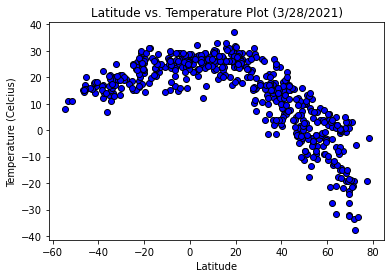

In [15]:
# cities

lat = cities.loc[:,'Lat']
temp = cities.loc[:,'Max Temp']

plt.scatter(lat,temp, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Latitude vs. Temperature Plot (3/28/2021)")
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Latitude")
plt.savefig('Latitude_vs_Temp_Plot_3_28_2021.png')

In [16]:
# Results: Latitude vs. Temperature Plot for 3/28/2021
    #Scatterplot shows the relation between latitude and temperature. Trend is as follows:
        # 1) As the latitude is closer to Zero (equator), the temperature increases.
        # 2) As the latitude moves away from from Zero (equator), the temperature decreases. 

## Latitude vs. Humidity Plot

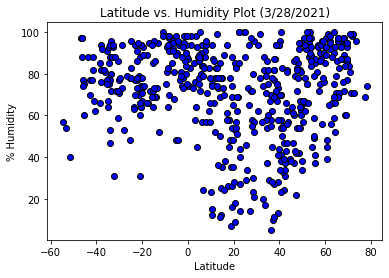

In [17]:
humid = cities.loc[:,'Humidity']

plt.scatter(lat,humid, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Latitude vs. Humidity Plot (3/28/2021)")
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.savefig('Latitude_vs_Humid_Plot_3_28_2021.png')

In [18]:
# Results: Latitude vs. Humidity Plot for 3/28/2021
    #Scatterplot shows the relation between latitude and % Humiditiy. Trend is as follows:
        # 1) there are more drier patches,  where the humidity is below 20%, in latitude areas between 0-60° 

## Latitude vs. Cloudiness Plot

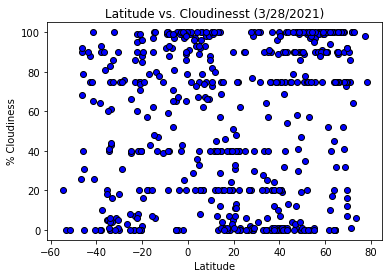

In [19]:
cloud = cities.loc[:,'Cloudiness']

plt.scatter(lat,cloud, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Latitude vs. Cloudinesst (3/28/2021)")
plt.ylabel("% Cloudiness")
plt.xlabel("Latitude")
plt.savefig('Latitude_vs_Cloud_Plot_3_28_2021.png')

## Latitude vs. Wind Speed Plot

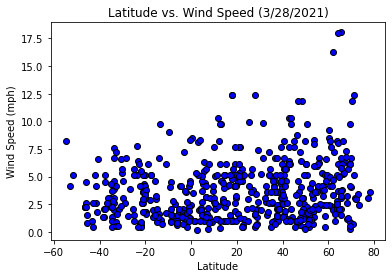

In [20]:
wind = cities.loc[:,'Wind Speed']

plt.scatter(lat,wind, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Latitude vs. Wind Speed (3/28/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('Latitude_vs_Wind_Plot_3_28_2021.png')

In [21]:
# Results:Latitude vs. Wind Speed Plot for 3/28/2021
    #Trend is as follows:
        #1) Wind speed is low for spring month with a high number of values below 5.0 mph.
        #2) There are a couple of outlier valuse at higher latitudes (northern global areas)

## Linear Regression

In [22]:
south_cities = cities.drop(cities[(cities['Lat']>0)].index, inplace=False)

south_lat = south_cities.loc[:,'Lat']
south_temp = south_cities.loc[:,'Max Temp']
south_wind = south_cities.loc[:,'Wind Speed']
south_cloud = south_cities.loc[:,'Cloudiness']
south_humid = south_cities.loc[:,'Humidity']

In [23]:
north_cities = cities.drop(cities[(cities['Lat']<0)].index, inplace=False)

north_lat = north_cities.loc[:,'Lat']
north_temp = north_cities.loc[:,'Max Temp']
north_wind = north_cities.loc[:,'Wind Speed']
north_cloud = north_cities.loc[:,'Cloudiness']
north_humid = north_cities.loc[:,'Humidity']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8619606309918073
The r^2-value is: 0.7429761293797946


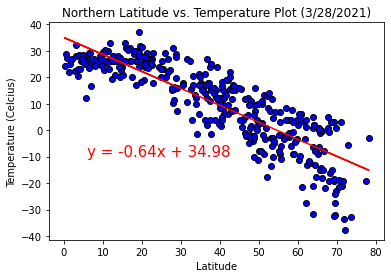

In [24]:
plt.scatter(north_lat,north_temp, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Northern Latitude vs. Temperature Plot (3/28/2021)")
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")
plt.savefig('North_Latitude_vs_Temp_LR_3_28_2021.png')

In [25]:
# Results:Northern Hemisphere - Temp vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of 0.84 meaning that there is a strong realtion between both the latitude and 
        #temperature. The R^2-value is 0.7487 which means that 74.87% of the time, the calculated trend line will be able 
        #to predict the temperature per latitude value. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6738753144079385
The r^2-value is: 0.45410793936839794


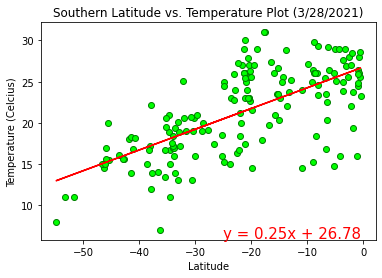

In [26]:
plt.scatter(south_lat,south_temp, marker = "o", facecolors = "lime", edgecolors = "green")

plt.title("Southern Latitude vs. Temperature Plot (3/28/2021)")
plt.ylabel("Temperature (Celcius)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(-25,6),fontsize=15,color="red")
plt.savefig('South_Latitude_vs_Temp_LR_3_28_2021.png')

In [27]:
# Results:Southern Hemisphere - Temp vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of 0.670 meaning that there is a weak realtion between both the latitude and 
        #temperature. The R^2-value is 0.4492 which means that 44.922% of the time, the calculated trend line will be able 
        #to predict the temperature per latitude value. The correlation is weak with a low R^2 value meaning it will be difficult
        #to predict the termperature per latitude value in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19803875742903987
The r^2-value is: 0.03921934944403809


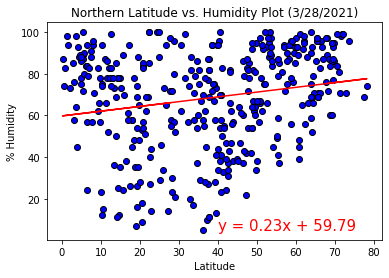

In [28]:
plt.scatter(north_lat,north_humid, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Northern Latitude vs. Humidity Plot (3/28/2021)")
plt.ylabel("% Humidity")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.savefig('North_Latitude_vs_Humid_LR_3_28_2021.png')

In [29]:
# Results: Northern Hemisphere - Humidity vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of 0.241 meaning that there is a weak to no realtion between both the latitude and 
        #humidity. The R^2-value is 0.05801 which means that 5.801% of the time, the calculated trend line will be able 
        #to predict the humidity per latitude value. The correlation is minimal with a low R^2 value meaning it will be difficult
        #to predict the humidity per latitude value in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22607637536769526
The r^2-value is: 0.05111052749939505


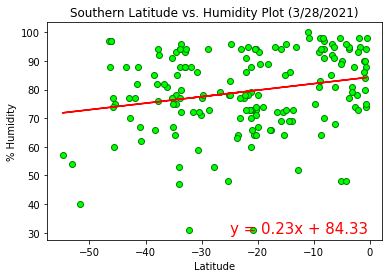

In [30]:
plt.scatter(south_lat,south_humid, marker = "o", facecolors = "lime", edgecolors = "green")

plt.title("Southern Latitude vs. Humidity Plot (3/28/2021)")
plt.ylabel("% Humidity")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.savefig('South_Latitude_vs_Humid_LR_3_28_2021.png')

In [31]:
# Results: Southern Hemisphere - Humidity vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of 0.1488 meaning that there is a weak to no realtion between both the latitude and 
        #humidity. The R^2-value is 0.02213 which means that 2.213% of the time, the calculated trend line will be able 
        #to predict the humidity per latitude value. The correlation is minimal with a low R^2 value meaning it will be difficult
        #to predict the humidity per latitude value in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19077897807979485
The r^2-value is: 0.03639661847717084


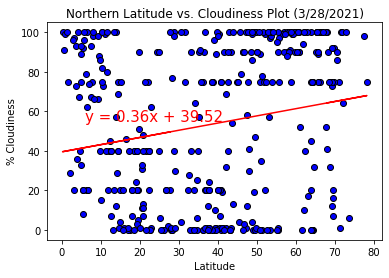

In [32]:
plt.scatter(north_lat,north_cloud, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Northern Latitude vs. Cloudiness Plot (3/28/2021)")
plt.ylabel("% Cloudiness")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(6,55),fontsize=15,color="red")
plt.savefig('North_Latitude_vs_Cloud_LR_3_28_2021.png')

In [33]:
# Results: Northern Hemisphere - Cloudiness vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of 0.2050 meaning that there is a weak to no realtion between both the latitude and 
        #cloudiness. The R^2-value is 0.042016 which means that 4.2016% of the time, the calculated trend line will be able 
        #to predict the cloudiness per latitude value. The correlation is minimal with a low R^2 value meaning it will be difficult
        #to predict the cloudiness per latitude value in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29831905342644766
The r^2-value is: 0.08899425763725173


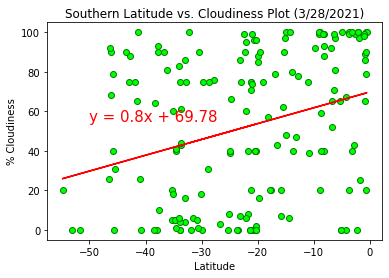

In [34]:
plt.scatter(south_lat,south_cloud, marker = "o", facecolors = "lime", edgecolors = "green")

plt.title("Southern Latitude vs. Cloudiness Plot (3/28/2021)")
plt.ylabel("% Cloudiness")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.savefig('South_Latitude_vs_Cloud_LR_3_28_2021.png')

In [35]:
# Results: Southern Hemisphere - Cloudiness vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of 0.2540 meaning that there is a weak to no realtion between both the latitude and 
        #cloudiness. The R^2-value is 0.06454 which means that 6.454% of the time, the calculated trend line will be able 
        #to predict the cloudiness per latitude value. The correlation is minimal with a low R^2 value meaning it will be difficult
        #to predict the cloudiness per latitude value in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12581899865783724
The r^2-value is: 0.01583042042326085


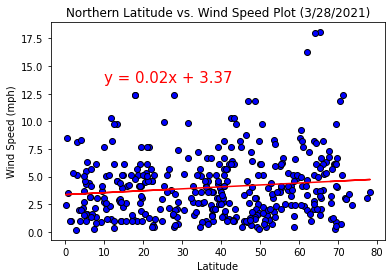

In [36]:
plt.scatter(north_lat,north_wind, marker = "o", facecolors = "blue", edgecolors = "black")

plt.title("Northern Latitude vs. Wind Speed Plot (3/28/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(10,13.5),fontsize=15,color="red")
plt.savefig('North_Latitude_vs_Wind_LR_3_28_2021.png')

In [37]:
# Results: Northern Hemisphere - Wind Speed vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of 0.10445 meaning that there is a weak to no realtion between both the latitude and 
        #wind speed. The R^2-value is 0.01092 which means that 1.092% of the time, the calculated trend line will be able 
        #to predict the wind speed per latitude value. The correlation is minimal with a low R^2 value meaning it will be difficult
        #to predict the wind speed per latitude value in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1427717039254122
The r^2-value is: 0.02038375944176556


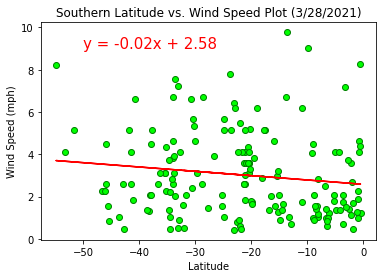

In [38]:
plt.scatter(south_lat,south_wind, marker = "o", facecolors = "lime", edgecolors = "green")

plt.title("Southern Latitude vs. Wind Speed Plot (3/28/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_lat,regress_values,"r-")
print(f"The r-value is: {rvalue}")
print(f"The r^2-value is: {rvalue**2}")
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")
plt.savefig('South_Latitude_vs_Wind_LR_3_28_2021.png')

In [39]:
# Results: Southern Hemisphere - Wind Speed vs. Latitude Linear Regression for 3/28/2021
    #Trend is as follows:
        #1) R-value has a correlation of -0.16064 meaning that there is a weak to no realtion between both the latitude and 
        #wind speed. The R^2-value is 0.0258 which means that 2.58% of the time, the calculated trend line will be able 
        #to predict the wind speed per latitude value. The correlation is minimal with a low R^2 value meaning it will be difficult
        #to predict the wind speed per latitude value in the Southern Hemisphere.